# Blinkist Analysis


# KPIS Requirements

Total sales,
Evarage Sales per sale,
Number of Items,
Evarage Rating

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Import Raw Data

In [2]:
data = pd.read_csv('blinkit_data.csv')

Size Of Dataset

In [3]:
print("The Size Of Dataset:", data.shape)

The Size Of Dataset: (8523, 12)


# Fields Info

Columns

In [4]:
data.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

Data Types

Data Types


In [5]:
data.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [6]:
data

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


50th Minute

# DATA CLEANING

In [7]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


Replace Values in 'Item Fat Content' Column

In [8]:
data['Item Fat Content'] = data['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [9]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat']


# Bussiness Requirements

KPI Requirements


In [10]:
# Total Sales
total_sales = data['Sales'].sum()

# Evarage Sales
evg_sale = data['Sales'].mean()

# No Of Items Sold
no_of_items_sold = data['Sales'].count()

# AVG Ratings
avg_ratings = data['Rating'].mean()


# Display KIPS
print(f'Total Sales: ${total_sales:,.1f}')
print(f'Evarage Sales: ${evg_sale:,.1f}')
print(f'Items Sold: {no_of_items_sold}')
print(f'Evarage Rating: {avg_ratings:,.0f}')

Total Sales: $1,201,681.5
Evarage Sales: $141.0
Items Sold: 8523
Evarage Rating: 4


# Charts

Total Sales By Fat Content

In [11]:
sales_by_fat = data.groupby('Item Fat Content')['Sales'].sum()

In [12]:
sales_by_fat

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Sales, dtype: float64

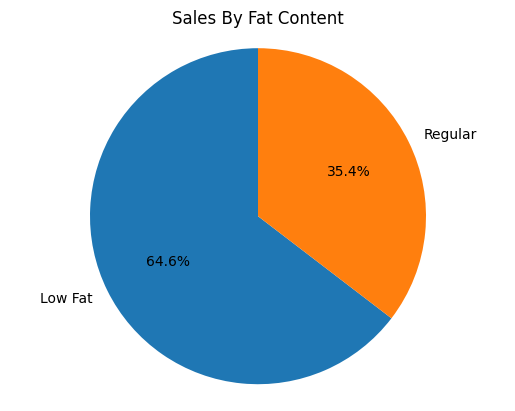

In [13]:
plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct = '%.1f%%',startangle = 90)
plt.title('Sales By Fat Content')
plt.axis('equal')
plt.show()

Total Sales Per Item

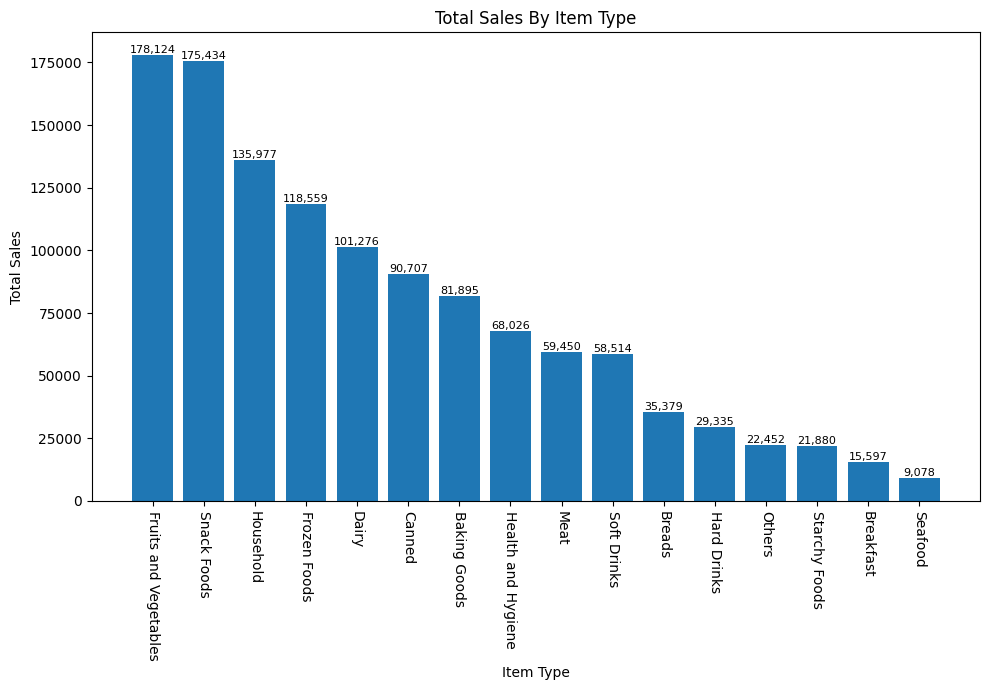

In [14]:
sales_by_type = data.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,7))
bars = plt.bar(sales_by_type.index,sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales By Item Type')


for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),
            f'{bar.get_height():,.0f}', ha = 'center',va = 'bottom',fontsize=8)
    
plt.tight_layout()
plt.show()


In [15]:
sales_by_type

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64

Seaborn

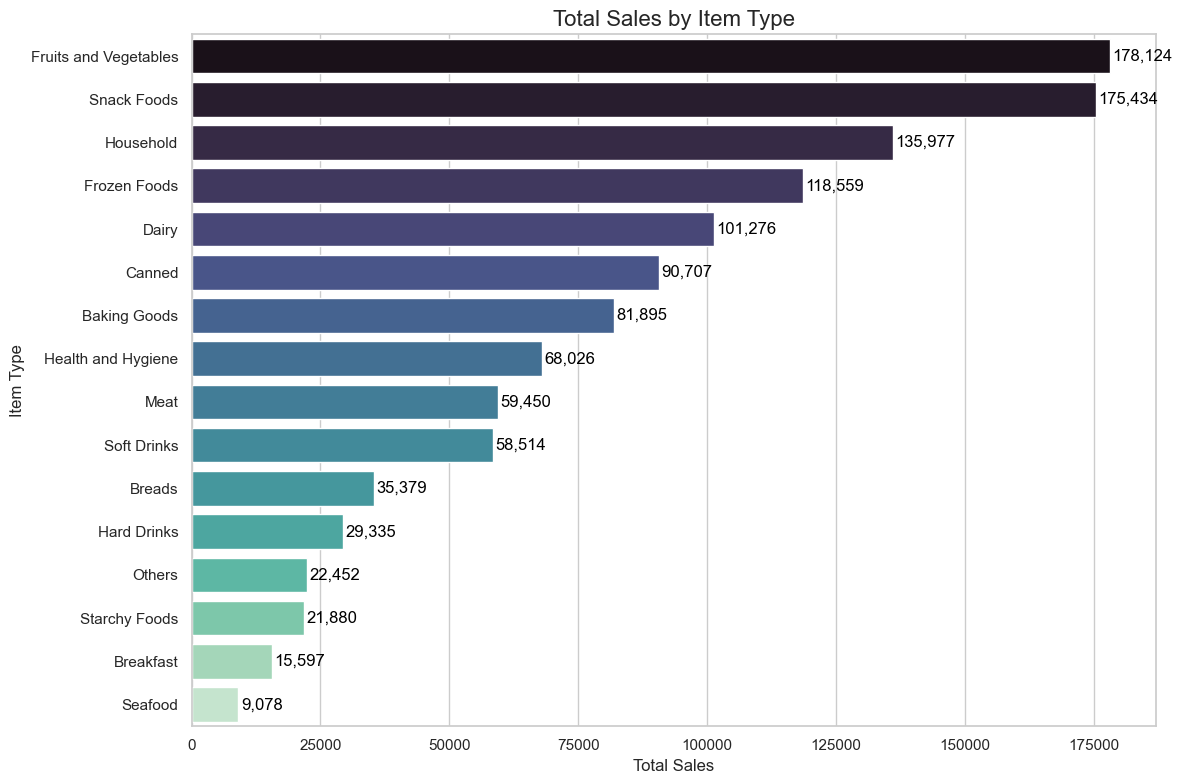

In [16]:

# Group and sort the data
sales_by_type = data.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

# Convert Series to DataFrame and reset index
df = sales_by_type.reset_index()
df.columns = ['Item Type', 'Total Sales']

# Plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

ax = sns.barplot(data=df, y='Item Type', x='Total Sales', palette='mako')
for i, v in enumerate(df['Total Sales']):
    ax.text(v + 500, i, f'{v:,.0f}', color='black', va='center')

plt.title("Total Sales by Item Type", fontsize=16)
plt.xlabel("Total Sales")
plt.ylabel("Item Type")
plt.tight_layout()
plt.show()


Fat Content by Outlet for Total Sales

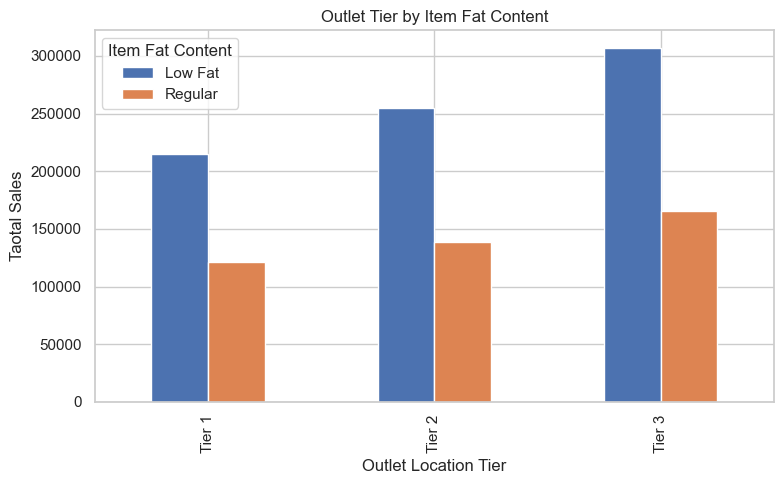

In [25]:
grouped = data.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped[['Regular','Low Fat']]
ax = grouped.plot(kind='bar',figsize = (8,5),title = 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Taotal Sales')
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

Total Sales By Outlet Establishment

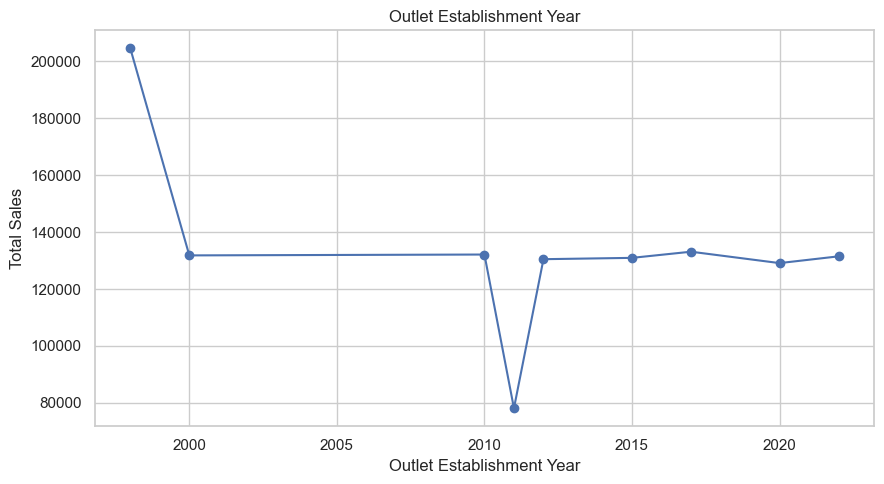

In [36]:
sales_by_year = data.groupby('Outlet Establishment Year')['Sales'].sum()
plt.figure(figsize = (9,5))
plt.plot(sales_by_year.index, sales_by_year.values,marker='o',linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment Year')
plt.tight_layout()
plt.show()

Total Sales By Outlet Size

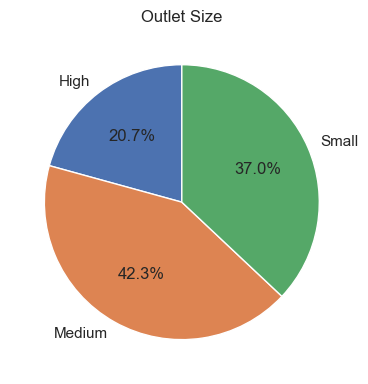

In [45]:
sales_by_size = data.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct = '%.1f%%',startangle = 90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

Sales By Oulet Location

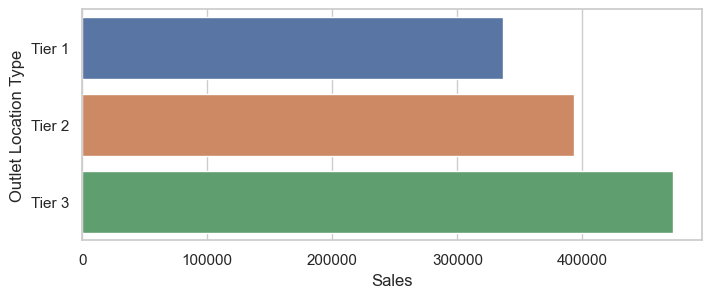

In [49]:
sales_by_location = data.groupby('Outlet Location Type')['Sales'].sum().reset_index()
plt.figure(figsize=(8,3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data = sales_by_location)
plt.show()